In [4]:
import random
import numpy as np
import tensorflow as tf

import matplotlib.pylab as plt
from matplotlib import gridspec
%matplotlib inline

In [14]:
#X_train = np.load('data/data3.npy')
X_train = np.load('../data/mbd/training/data1.npy')
print(X_train.shape)
X_train = np.moveaxis(X_train,0,2)
y = np.load('../data/mbd/training/building_bitmaps/label_1.npy')
lx,ly = y.shape

(3, 1500, 1500)


In [17]:
y.shape

(1500, 1500)

In [16]:
X_train.shape

(1500, 1500, 3)

In [6]:
def data_provider(n=1,lw = 64):
    X_batch = np.zeros((n,lw,lw,3))
    y_batch = np.zeros((n,lw,lw,1))
    nn = 0
    while True:
        ir = np.random.randint(0,lx-lw)
        #print('ir: ', ir)
        jr = np.random.randint(0,ly-lw)
        #print('jr', jr)
        yy = y[ir:ir+lw,jr:jr+lw]
        #print('yy: ', yy)
        #print('yy shape: ', yy.shape)
        #print('yy sum: ', yy.sum())
        #print('X_batch[0]', X_batch[nn])
        if yy.sum()>5*255:
            X_batch[nn] = X_train[ir:ir+lw,jr:jr+lw,:]
            y_batch[nn,:,:,0] = yy
            nn = nn+1
        if nn==n:
            break
    return X_batch,y_batch

In [13]:
data_provider()[0].shape

(1, 64, 64, 3)

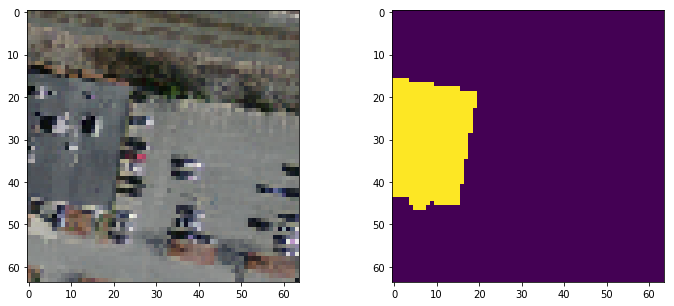

In [16]:
lw = 64
X_batch,y_batch = data_provider(n=2,lw = lw)

fig = plt.figure(figsize=(12, 5))
gs = gridspec.GridSpec(1,2)
ax = fig.add_subplot(gs[0,0])
ax.imshow(X_batch[0,:,:,:].astype(np.uint8))
ax = fig.add_subplot(gs[0,1])
ax.imshow(y_batch[0,:,:,0])

In [12]:
learning_rate = 0.01

x_in = tf.placeholder(tf.float32,[None,lw,lw,3])
y_true = tf.placeholder(tf.float32,[None,lw,lw,1])

x = tf.layers.conv2d(x_in,filters=12,kernel_size=3,strides=(1, 1),padding='same',
    activation=tf.nn.relu)
x = tf.layers.conv2d(x,filters=12,kernel_size=3,strides=(1, 1),padding='same',
    activation=tf.nn.relu)
x = tf.layers.conv2d(x,filters=12,kernel_size=3,strides=(1, 1),padding='same',
    activation=tf.nn.relu)

x = tf.layers.dropout(x, 0.5)

y_pred = tf.layers.conv2d(x,filters=1,kernel_size=1,strides=(1, 1),padding='same',
    activation=tf.nn.relu)

cost = tf.losses.mean_squared_error(y_pred,y_true)
# cost = tf.losses.softmax_cross_entropy(y_true,y_pred)
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)
# optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

init = tf.global_variables_initializer()

sess = tf.InteractiveSession()
sess.run(init)

In [104]:
training_epochs = 10
for epoch in range(training_epochs):
    # Loop over all batches
    cc = 0
    ii = 0
    for i in range(200):
        x_b,y_b = data_provider(n=3,lw=lw)   
        # Run optimization op (backprop) and cost op (to get loss value)
        _, c = sess.run([optimizer, cost], feed_dict={x_in: x_b, y_true: y_b})
        cc += c
        ii += 1
    # Display logs per epoch step
    print('Epoch:{:d}, cost= {:6.2f}'.format(epoch, cc/ii))
    

Epoch:0, cost= 10020.62
Epoch:1, cost= 7919.03
Epoch:2, cost= 8377.46
Epoch:3, cost= 7370.51
Epoch:4, cost= 7878.01
Epoch:5, cost= 7551.42
Epoch:6, cost= 7426.74
Epoch:7, cost= 7526.11
Epoch:8, cost= 7856.79
Epoch:9, cost= 7581.86


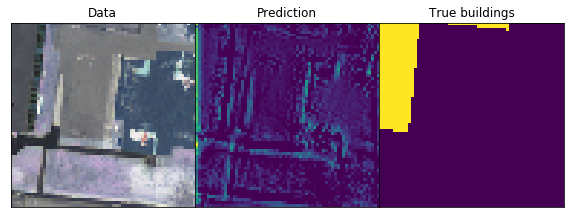

In [17]:
X_train = np.load('../data/mbd/training/data1.npy')
X_train = np.moveaxis(X_train,0,2)
y = np.load('../data/mbd/training/building_bitmaps/label_1.npy')
lx,ly = y.shape

xs,ys = data_provider(n=1,lw = lw)
        
yt_pred = sess.run(y_pred, feed_dict={x_in: xs})
# print('yt_pred: ', yt_pred)
#print('yt_pred shape: ', yt_pred.shape)
gs = gridspec.GridSpec(1, 3)
plt.figure(figsize=(8,3.5)) 
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])
ax3 = plt.subplot(gs[0, 2])
ax1.set_xticks([])
ax1.set_yticks([])
ax2.set_xticks([])
ax2.set_yticks([])
ax3.set_xticks([])
ax3.set_yticks([])
ax1.set_title('Data')
ax2.set_title('Prediction')
ax3.set_title('True buildings')
ax1.imshow(xs[0,:,:,:])    
ax2.imshow(yt_pred[0,:,:,0])
ax3.imshow(ys[0,:,:,0])
plt.subplots_adjust(wspace=0,bottom=0.02, top=0.96, left=0.02, right=0.98)
plt.savefig('prediction9.jpg')

In [133]:
ys[0,:,:,0].sum()/255

325.0

In [128]:
ys[0,:,:,0].shape

(64, 64)

In [136]:
yt_pred[0,:,:,0].sum()/255

1201.1078431372548